<a href="https://colab.research.google.com/github/Echevarriaj93/Loan_Defaults/blob/main/DATA6999_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Investigating Loan Default Data

Checklist:

- Basic data cleaning and feature exploration

- Exploratory data analysis (Answering questions we have of the data)

- Basic Data Engineering (Creating a pipeline for tain and test sets)

- Model Experimentation and parameter tuning (Linear Regression, Random Forest, XGBoost, MLP)

- Feature Engineering

- Model Selection



##Data Dictionary



- Loan Amount: Loan Amount applied for in dollars
- Funded Amount: Actual amount funded by investor after fees
- Funded Amount Investor: Amount to be funded before fees
- Term: Loan Term in months
- Interest Rate: Interest rate assigned to loan
- Grade: Credit Grade of borrower application
- Sub Grade: Sub Grade of borrower application
- Employment Duration: Homeownership status
- Home Ownership: Income in dollars
- Verification Status: Verification status of reported income
- Loan Title: The reason for the borrower requesting a loan as written by the borrower
- Debit to Income: Debt to Income Ratio (Monthly debt divided by monthly income)
- Delinquency - two years: Number of delinquencies in the last two years
- Inquires - six months: Number of credit inquiries in the last 6 months
- Open Account: Number of active open credit line accounts
- Public Record: Number of derogatory public records
- Revolving Balance: The balance that carries over from one month to the next
- Revolving Utilities: Utilization refers to how much of your credit balance you're using at a given time (monthly)
- Total Accounts: Total accounts (open and closed)
- Total Received Interest: Total Interest payments received to date
- Total Received Late Fee: Total late payments received
- Recoveries: Total amount of money recovered by a lender after a loan has been charged off
- Collection Recovery Fee: Percentage of the amount recovered by the collection agency
- Collection 12 months Medical: Number of collections excluding medical
- Accounts Delinquent: Number of delinquent accounts or whether the account is delinquent. Not enough info.
- Total Collection Amount: Total amount ever recovered by collections
- Total Current Balance: Total credit line balance from all accounts
- Total Revolving Credit Limit: Total credit card limit across all accounts
- Loan Status: Whether the account defaulted or not. 1 = Defaulter, 0 = Non-Defaulter











In [ ]:
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer, PowerTransformer
from sklearn.utils import shuffle



# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Feature Selection

# Import the necessary libraries first
#### Correlation method - for classification chi2 only
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
#### RFE method - replace the model with the model you plan to use
from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
#### feature importance method
#### this method can be used for both topK and cut-off
from sklearn.linear_model import Ridge
#### specifically tree-based feature importance method
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
#### for voting
from collections import Counter
#### for ANOVA
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# balance the data
from imblearn.over_sampling import SMOTE


# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier

#hyperparameter tuning
import time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# balance the data
from imblearn.over_sampling import SMOTE

from scipy.stats import ttest_ind

import datetime
from tqdm import tqdm
from itertools import combinations

RANDOM_STATE = int(datetime.date.today().year)

#recall

from sklearn.metrics import recall_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA6999:Capstone/Loan Default/train.csv')


df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
#Only using columns shown in research to be predictors of oan default.

df = df[['Loan Amount',
'Funded Amount',
'Funded Amount Investor',
'Term',
'Interest Rate',
'Grade',
'Sub Grade',
'Employment Duration',
'Home Ownership',
'Verification Status',
'Loan Title',
'Debit to Income',
'Delinquency - two years',
'Inquires - six months',
'Open Account',
'Public Record',
'Revolving Balance',
'Revolving Utilities',
'Total Accounts',
'Total Received Interest',
'Total Received Late Fee',
'Recoveries',
'Collection Recovery Fee',
'Collection 12 months Medical',
'Accounts Delinquent',
'Total Collection Amount',
'Total Current Balance',
'Total Revolving Credit Limit',
'Loan Status']]

In [ ]:
df = df.rename(columns={'Home Ownership': 'Income', 'Employment Duration': 'Homeownership'})

##EDA

In [ ]:
df.shape

(67463, 29)

In [ ]:
#I see no use in any of the features being of object data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Grade                         67463 non-null  object 
 6   Sub Grade                     67463 non-null  object 
 7   Homeownership                 67463 non-null  object 
 8   Income                        67463 non-null  float64
 9   Verification Status           67463 non-null  object 
 10  Loan Title                    67463 non-null  object 
 11  Debit to Income               67463 non-null  float64
 12  Delinquency - two years       67463 non-null  int64  
 13  I

## Numerical Features

In [ ]:
cont_df = df.select_dtypes(include=['int64', 'float64'])

<ipython-input-349-3b266ce57868>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

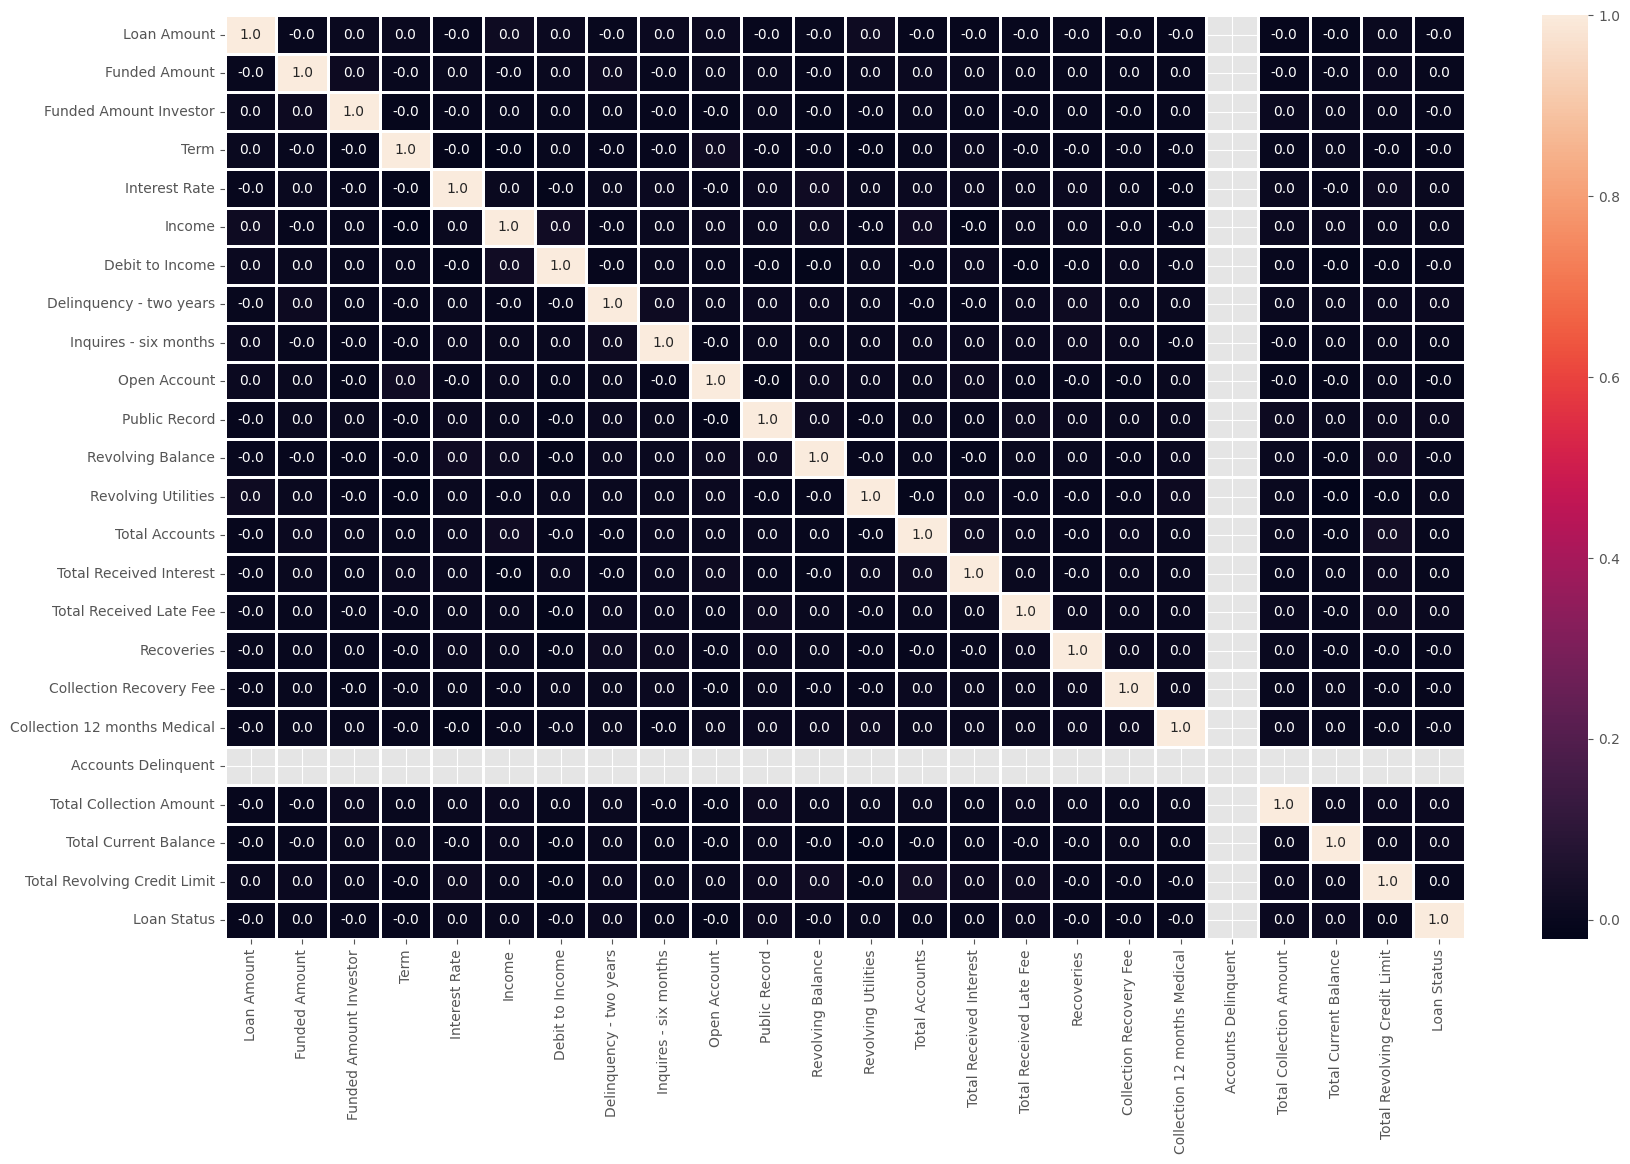

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,linewidths=1,fmt='.1f')

In [ ]:
cont_df.describe().loc[['min', 'max', 'mean', 'std']].T

,min,max,mean,std
Loan Amount,1014.000000,3.500000e+04,16848.902776,8367.865726
Funded Amount,1014.000000,3.499900e+04,15770.599114,8150.992662
Funded Amount Investor,1114.590204,3.499975e+04,14621.799323,6785.345170
Term,36.000000,5.900000e+01,58.173814,3.327441
Interest Rate,5.320006,2.718235e+01,11.846258,3.718629
Income,14573.537170,4.065615e+05,80541.502522,45029.120366
Debit to Income,0.675299,3.962986e+01,23.299241,8.451824
Delinquency - two years,0.000000,8.000000e+00,0.327127,0.800888
Inquires - six months,0.000000,5.000000e+00,0.145754,0.473291
Open Account,2.000000,3.700000e+01,14.266561,6.225060


In [ ]:
df['Loan Amount'].sort_values()

46644     1014
4684      1020
62698     1024
4851      1025
29278     1030
         ...  
24347    34995
49631    34996
56396    34997
26928    34999
49120    35000
Name: Loan Amount, Length: 67463, dtype: int64

In [ ]:
cont_df.isna().sum()

Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Interest Rate                   0
Income                          0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Accounts Delinquent             0
Total Collection Amount         0
Total Current Balance           0
Total Revolving Credit Limit    0
Loan Status                     0
dtype: int64

In [ ]:
df.select_dtypes(include=['int64', 'float64']).nunique()


Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Interest Rate                   67448
Income                          67454
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection Recovery Fee         67313
Collection 12 months Medical        2
Accounts Delinquent                 1
Total Collection Amount          2193
Total Current Balance           60901
Total Revolving Credit Limit    37708
Loan Status                         2
dtype: int64

###These numerical features are better used as cateogrical later since the numeric assignments are non-continuous, rather they represent a level of intensity on a scale.

In [ ]:
df['Term'].unique()

array([59, 36, 58])

In [ ]:
df['Collection 12 months Medical'].unique()

array([0, 1])

### Selection of numerical features to Objects


In [ ]:
df[['Term','Collection 12 months Medical']]=df[['Term','Collection 12 months Medical']].astype('category')

## Categorical Features

In [ ]:
#Number of Unique values of each objecy and categorical feature

df.select_dtypes(include=['object', 'category']).nunique()

Term                              3
Grade                             7
Sub Grade                        35
Homeownership                     3
Verification Status               3
Loan Title                      109
Collection 12 months Medical      2
dtype: int64

In [ ]:
df['Term'].value_counts()

59    43780
58    22226
36     1457
Name: Term, dtype: int64

In [ ]:
df['Term'] = np.where(df['Term'] == 36, '3 years', '5 years' )

In [ ]:
df['Term'].value_counts()


5 years    66006
3 years     1457
Name: Term, dtype: int64

### Grades & Sub-Grades

In [ ]:
#Loan grading is the process of assigning a quality score to a loan application to identify a risk of default.

df['Grade'].value_counts()

C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64

In [ ]:
#Sub grades seem to be correlated with grades but not perfectly. We can see more
#loans under the G subgrades than in the actual G grade for example

df['Sub Grade'].value_counts()

B4    4462
C1    4188
B3    3999
A5    3540
B2    3520
B5    3408
D1    3304
C4    3250
C2    3219
C3    3121
B1    2924
C5    2472
A4    2264
D4    2050
D2    1963
D5    1952
A2    1837
D3    1824
E2    1746
A3    1685
A1    1364
E3    1321
E1    1298
E4    1117
F2     947
F1     824
E5     769
F5     582
F3     578
G2     447
F4     441
G1     366
G5     284
G3     246
G4     151
Name: Sub Grade, dtype: int64

In [ ]:
df['Homeownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

In [ ]:
df['Verification Status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [ ]:
df['Verification Status'].value_counts()

Source Verified    33036
Verified           18078
Not Verified       16349
Name: Verification Status, dtype: int64

In [ ]:
df['Verification Status'] = np.where(df['Verification Status'] == 'Source Verified', 'Verified',df['Verification Status'] )

df['Verification Status'].value_counts()

Verified        51114
Not Verified    16349
Name: Verification Status, dtype: int64

In [ ]:
df['Collection 12 months Medical'].value_counts()

0    66026
1     1437
Name: Collection 12 months Medical, dtype: int64

# Loan Title Consolidation

In [ ]:
#some of these loan titles are the same but recorded with different spelling/verbiage
#May be useful to make a top 20

df['Loan Title'].unique()

array(['Debt Consolidation', 'Debt consolidation',
       'Credit card refinancing', 'Home improvement',
       'Credit Consolidation', 'Green loan', 'Other',
       'Moving and relocation', 'Credit Cards', 'Medical expenses',
       'DEBT CONSOLIDATION', 'Home Improvement', 'Refinance',
       'credit card consolidation', 'Lending Club',
       'Debt Consolidation Loan', 'Major purchase', 'Vacation',
       'Business', 'Credit card payoff', 'Credit Card Consolidation',
       'credit card', 'Credit Card Refi', 'Personal Loan', 'CC Refi',
       'consolidate', 'Medical', 'Loan 1', 'Consolidation',
       'Card Consolidation', 'Car financing', 'debt', 'home improvement',
       'debt consolidation', 'Home buying', 'Freedom', 'Consolidate',
       'Consolidated', 'get out of debt', 'consolidation loan',
       'Dept consolidation', 'Personal loan', 'Personal', 'Debt', 'cards',
       'Cards', 'Bathroom', 'refi', 'Credit Card Loan',
       'Credit Card Debt', 'House', 'Debt Consolidation 

In [ ]:
#Since it looks like the top3 make up 90% we will replace the rest with Other

df['Loan Title'].value_counts()

#change to lowercase df.lower()

Credit card refinancing    30728
Debt consolidation         24841
Debt Consolidation          3544
Other                       2455
Home improvement            2211
                           ...  
Home loan                      6
Personal loan                  5
Getting Ahead                  5
Credit                         4
bills                          4
Name: Loan Title, Length: 109, dtype: int64

In [ ]:
df['Loan Title'] = df['Loan Title'].str.lower()

In [ ]:
df['Loan Title'].value_counts()

credit card refinancing       30728
debt consolidation            28536
other                          2455
home improvement               2294
major purchase                  487
                              ...  
credit card refinance loan        6
wedding loan                      6
getting ahead                     5
credit                            4
bills                             4
Name: Loan Title, Length: 83, dtype: int64

In [ ]:
#sum up $ by categories

df.groupby('Loan Title')[['Loan Amount']].sum().sort_values('Loan Amount', ascending=False)

,Loan Amount
Loan Title,
credit card refinancing,517387868
debt consolidation,482470110
other,40839733
home improvement,37584053
major purchase,8358361
...,...
cc,92257
credit,88933
getting ahead,83843


In [ ]:
df['Loan Title'].shape[0]

67463

In [ ]:
df.loc[df['Loan Title'].str.contains('refi'), 'Loan Title'] = 'Refinance'

df.loc[df['Loan Title'].str.contains('consol|conso|pay|credit|cc|credit'), 'Loan Title'] = 'Consolidation'

df.loc[df['Loan Title'].str.contains('medic'), 'Loan Title'] = 'Medical'

df.loc[df['Loan Title'].str.contains('home|bathroom|pool|house'), 'Loan Title'] = 'Home Improvement'

df.loc[df['Loan Title'].str.contains('major|car'), 'Loan Title'] = 'Major Purchase'

df.loc[df['Loan Title'].str.contains('business|green'), 'Loan Title'] = 'Business'

df.loc[df['Loan Title'].str.contains('debt|relief|freedom|getting ahead'), 'Loan Title'] = 'Unknown Debt Relief'

df.loc[df['Loan Title'].str.contains('personal|vacation|bill|club|wedding'), 'Loan Title'] = 'Personal'

df.loc[df['Loan Title'].str.contains('other|moving|loan'), 'Loan Title'] = 'Other Loan'


df['Loan Title'].value_counts()

Refinance              30942
Consolidation          29670
Other Loan              2732
Home Improvement        2467
Major Purchase           659
Personal                 300
Medical                  258
Business                 228
Unknown Debt Relief      207
Name: Loan Title, dtype: int64

#These are

In [ ]:
sum(df['Loan Status'] == 1)

6241

In [ ]:
df['Loan Title'].value_counts().sum()

67463

In [ ]:
#The distribution of default cases as ratios per category.
#Over 95% of default cases can be found in the top 5 categories

(df.groupby('Loan Status')['Loan Title'].value_counts()[9:]/df.groupby('Loan Status')['Loan Title'].value_counts()[9:].sum())*100

Loan Status  Loan Title         
1            Refinance              46.739305
             Consolidation          42.893767
             Other Loan              4.005768
             Home Improvement        3.829515
             Major Purchase          1.137638
             Personal                0.432623
             Medical                 0.336485
             Unknown Debt Relief     0.336485
             Business                0.288415
Name: Loan Title, dtype: float64

In [ ]:
loan_titles = list(df['Loan Title'].value_counts().index[:5])

df = df[df['Loan Title'].isin(loan_titles)].reset_index(drop=True)

df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Homeownership,Income,Verification Status,...,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,5 years,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,...,2929.646315,0.102055,2.498291,0.793724,0,0,31,311301,6619,0
1,3609,11940,12191.99692,5 years,12.237563,C,D3,RENT,39833.92100,Verified,...,772.769385,0.036181,2.377215,0.974821,0,0,53,182610,20885,0
2,28276,9311,21603.22455,5 years,12.545884,F,D4,MORTGAGE,91506.69105,Verified,...,863.324396,18.778660,4.316277,1.020075,0,0,34,89801,26155,0
3,11170,6954,17877.15585,5 years,16.731201,C,C3,MORTGAGE,108286.57590,Verified,...,288.173196,0.044131,0.107020,0.749971,0,0,40,9189,60214,0
4,16890,13226,13539.92667,5 years,15.008300,C,D4,MORTGAGE,44234.82545,Verified,...,129.239553,19.306646,1294.818751,0.368953,0,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66465,13601,6848,13175.28583,5 years,9.408858,C,A4,MORTGAGE,83961.15003,Verified,...,1978.945960,0.023478,564.614852,0.865230,0,0,48,181775,34301,1
66466,8323,11046,15637.46301,5 years,9.972104,C,B3,RENT,65491.12817,Verified,...,3100.803125,0.027095,2.015494,1.403368,0,0,37,22692,8714,0
66467,15897,32921,12329.45775,5 years,19.650943,A,F3,MORTGAGE,34813.96985,Verified,...,2691.995532,0.028212,5.673092,1.607093,0,0,17,176857,42330,0
66468,16567,4975,21353.68465,5 years,13.169095,D,E3,OWN,96938.83564,Not Verified,...,3659.334202,0.074508,1.157454,0.207608,0,0,61,361339,39075,0


In [ ]:
df.groupby('Loan Title')[['Loan Amount']].sum().sort_values('Loan Amount', ascending=False)

,Loan Amount
Loan Title,
Refinance,521084771
Consolidation,501993964
Other Loan,45479426
Home Improvement,40556432
Major Purchase,11263372


In [ ]:
df['Loan Title'].value_counts()

Refinance           30942
Consolidation       29670
Other Loan           2732
Home Improvement     2467
Major Purchase        659
Name: Loan Title, dtype: int64

In [ ]:
df.shape

(66470, 29)

### Objects to categories

In [ ]:
#converting object into cateogry

def convert_obj_to_cat(df):
    obj_cols = df.select_dtypes(include=['object']).columns
    df[obj_cols] = df[obj_cols].astype('category')
    return df

df = convert_obj_to_cat(df)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66470 entries, 0 to 66469
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Loan Amount                   66470 non-null  int64   
 1   Funded Amount                 66470 non-null  int64   
 2   Funded Amount Investor        66470 non-null  float64 
 3   Term                          66470 non-null  category
 4   Interest Rate                 66470 non-null  float64 
 5   Grade                         66470 non-null  category
 6   Sub Grade                     66470 non-null  category
 7   Homeownership                 66470 non-null  category
 8   Income                        66470 non-null  float64 
 9   Verification Status           66470 non-null  category
 10  Loan Title                    66470 non-null  category
 11  Debit to Income               66470 non-null  float64 
 12  Delinquency - two years       66470 non-null  

## Data Profile

<Axes: >

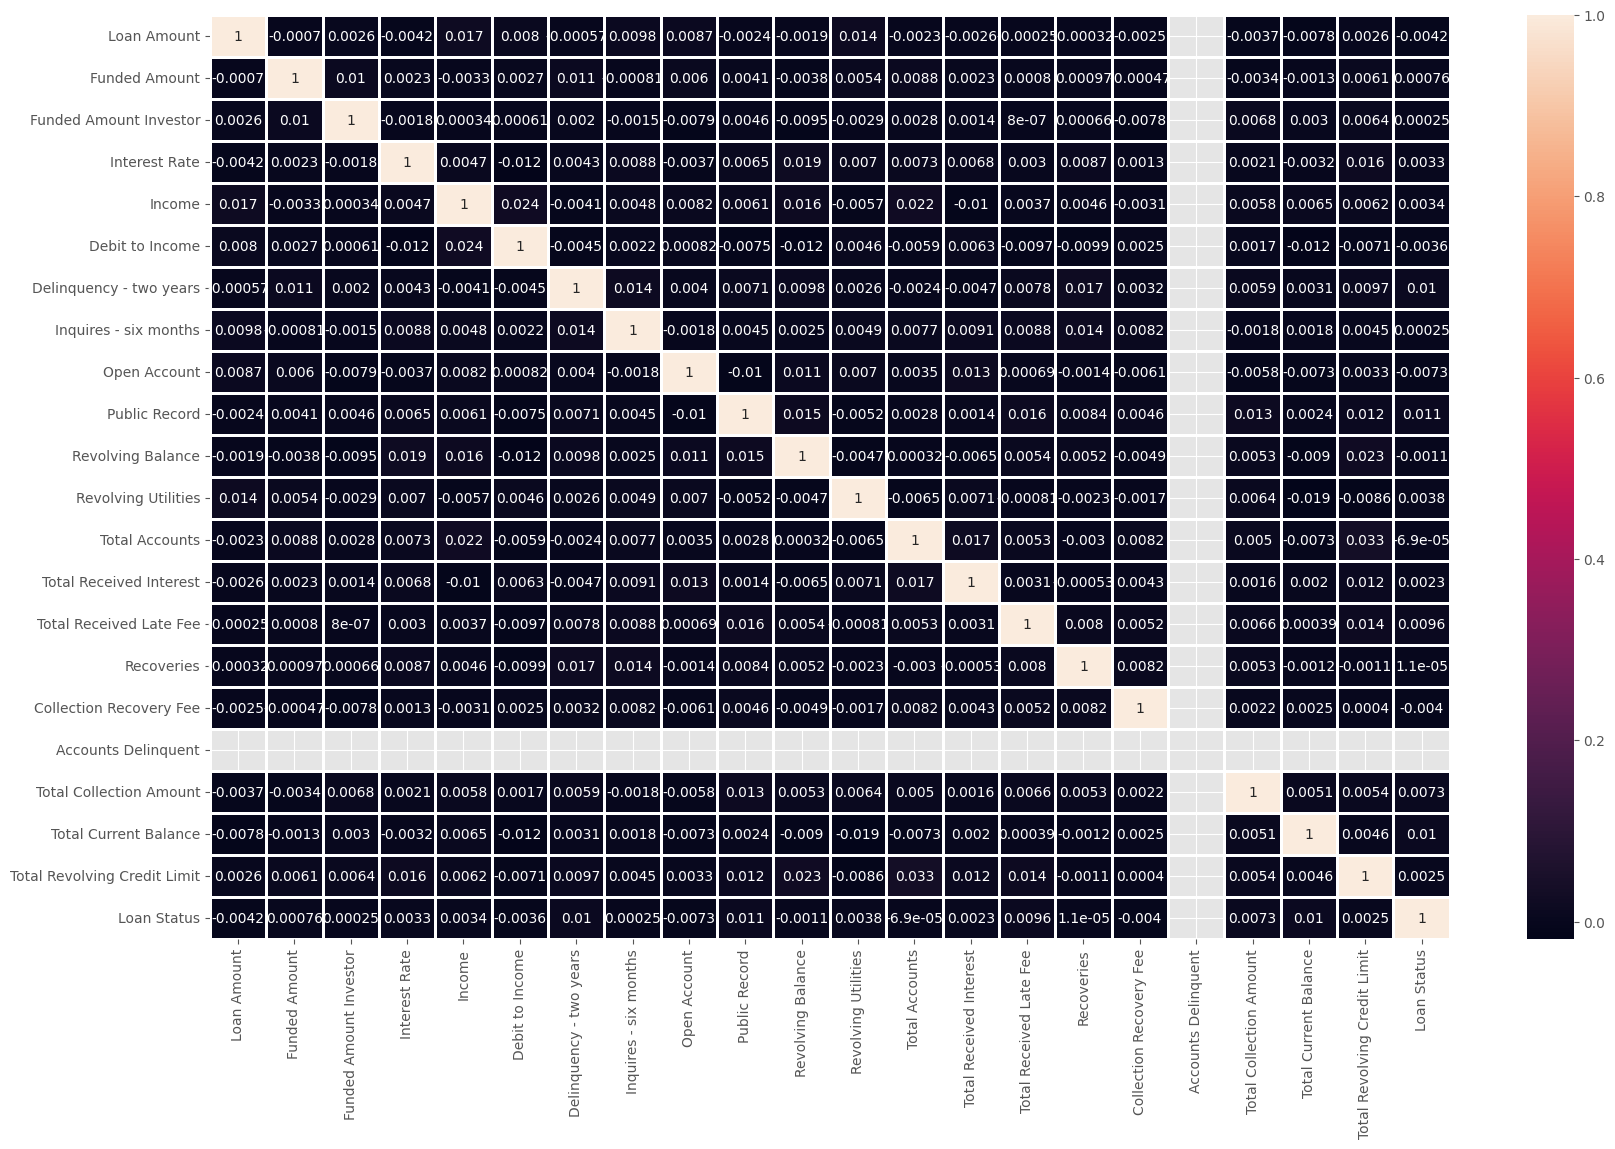

In [ ]:
corr = df.select_dtypes(include=['int64', 'float64']).corr('pearson')
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,linewidths=1)

In [ ]:
# !pip install ydata-profiling
# from ydata_profiling import ProfileReport

# profile_eda = ProfileReport(df)

# profile_eda

###Dropping columns that wil not be useful



In [ ]:
#Accounts delinquent only has 1 value of 0 and thus may not be useful for our model

df = df.drop(['Accounts Delinquent'], axis =1)

##Is the Data Distribution Normal?

###Skewness

We can see some columns need to have their skewness removed

<ipython-input-386-6ce6f21d3aab>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().plot(kind='bar')


<Axes: >

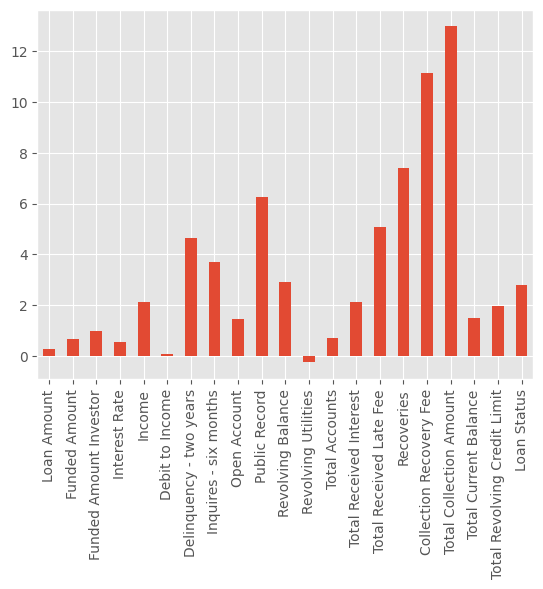

In [ ]:
df.skew().plot(kind='bar')

In [ ]:
df.skew() > .5

<ipython-input-387-ae055b652723>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew() > .5


Loan Amount                     False
Funded Amount                    True
Funded Amount Investor           True
Interest Rate                    True
Income                           True
Debit to Income                 False
Delinquency - two years          True
Inquires - six months            True
Open Account                     True
Public Record                    True
Revolving Balance                True
Revolving Utilities             False
Total Accounts                   True
Total Received Interest          True
Total Received Late Fee          True
Recoveries                       True
Collection Recovery Fee          True
Total Collection Amount          True
Total Current Balance            True
Total Revolving Credit Limit     True
Loan Status                      True
dtype: bool

### In the pipeline below I will apply the power transformer to reduce the skewness.

###Scaling

It is obvious form the data dispalyed below that features are on totally different scales. We will have to use scaling to prepare our data for the model.

In [ ]:
numeric_data = pd.DataFrame(df._get_numeric_data())

numeric_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Loan Amount,66470.0,16855.392884,8367.944082,1014.000000,10018.250000,16078.000000,22115.000000,3.500000e+04
Funded Amount,66470.0,15769.040906,8150.820736,1014.000000,9261.250000,13040.000000,21792.000000,3.499900e+04
Funded Amount Investor,66470.0,14620.409177,6784.327870,1114.590204,9831.245016,12794.947990,17797.473673,3.499975e+04
Interest Rate,66470.0,11.843495,3.717460,5.320006,9.294964,11.374929,14.191622,2.718235e+01
Income,66470.0,80491.888487,44999.719433,14573.537170,51686.284907,69307.986855,94515.125740,4.065615e+05
Debit to Income,66470.0,23.299131,8.450089,0.675299,16.761080,22.656962,30.044515,3.962986e+01
Delinquency - two years,66470.0,0.327230,0.801684,0.000000,0.000000,0.000000,0.000000,8.000000e+00
Inquires - six months,66470.0,0.145389,0.472044,0.000000,0.000000,0.000000,0.000000,5.000000e+00
Open Account,66470.0,14.271401,6.226777,2.000000,10.000000,13.000000,16.000000,3.700000e+01
Public Record,66470.0,0.081285,0.346704,0.000000,0.000000,0.000000,0.000000,4.000000e+00


###Outliers

<ipython-input-389-8290e1715487>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7, 4, n+1) #Adjust rows, columns of subplots


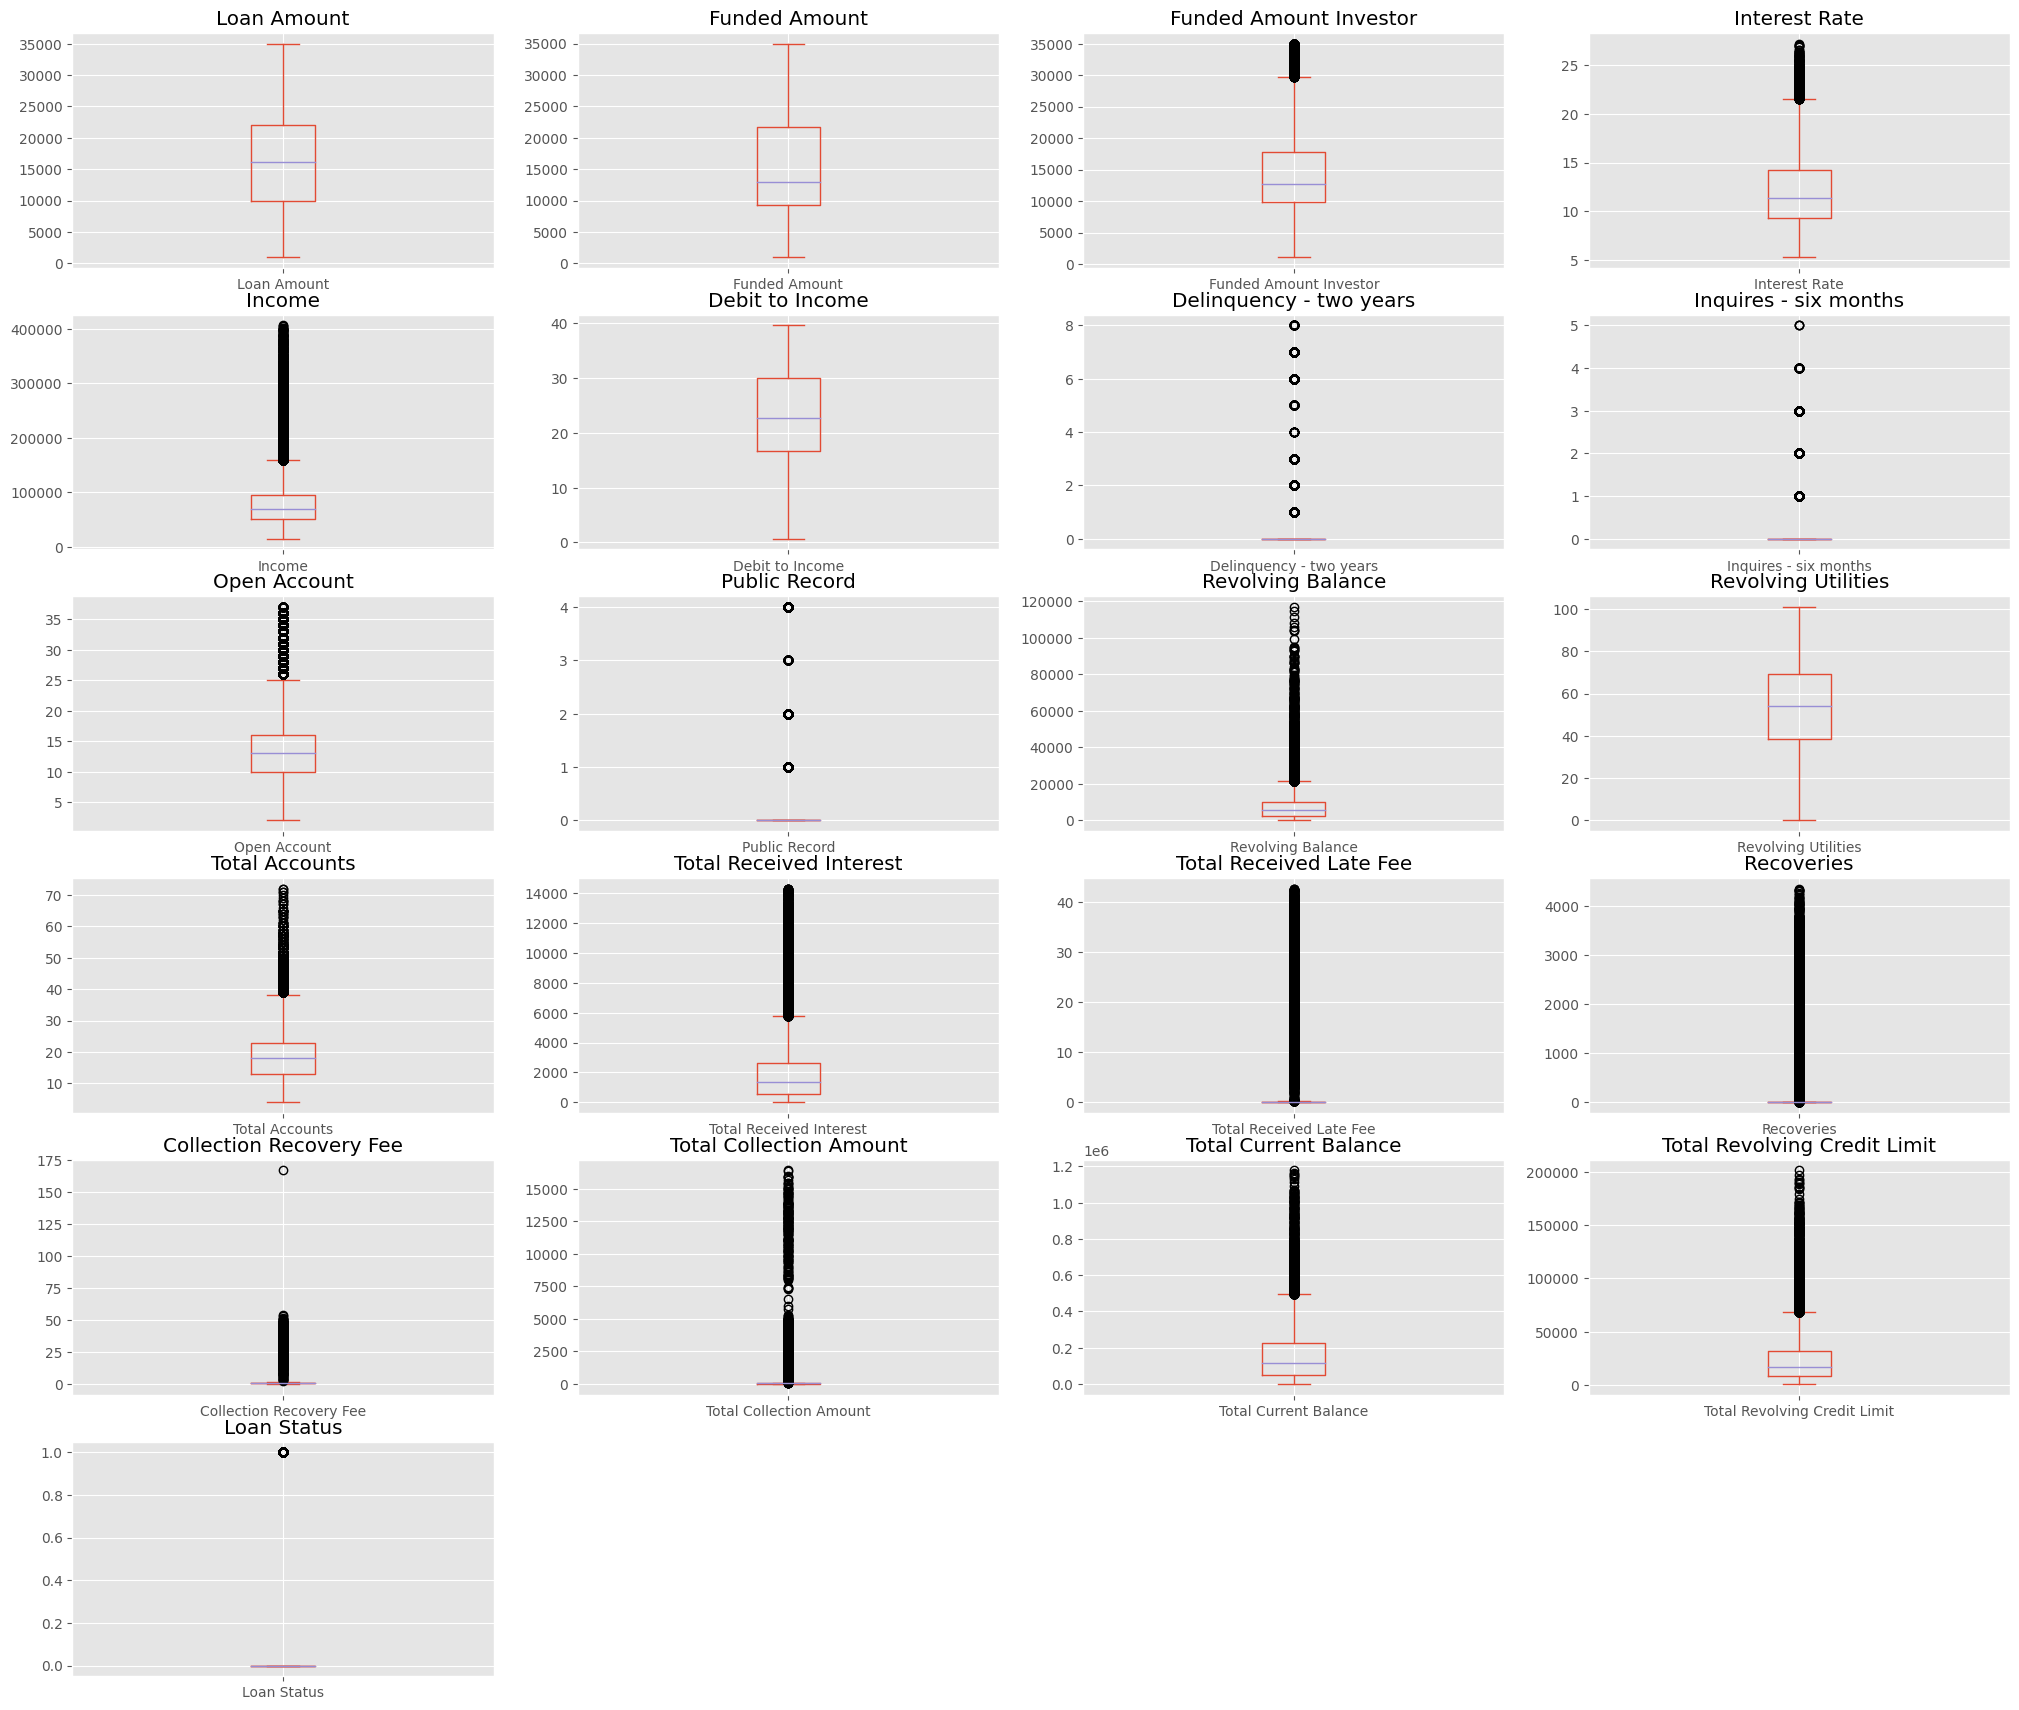

In [ ]:
#The numeric data

#From the boxplots we see the presence of outliers. This can skew the data.
#I am aiming for a normal distribution for my models.

numeric_data = pd.DataFrame(df._get_numeric_data())

fig, ax = plt.subplots(figsize = (25, 25)) #change size
for n, col in enumerate(numeric_data.columns):
    plt.subplot(7, 4, n+1) #Adjust rows, columns of subplots
    numeric_data[col].plot(ax = plt.gca(), kind='box')
    plt.title(col)

plt.show()

##Summary of EDA


- No missing values and I was able to drop columns with only 1 unique value.They were: `Payment Plan` and `Accounts Delinquent`

- Reduced Unique Categories of `Loan Title `to top 3 which held 90% of values previously.



- No Duplicates

- There are some imblanced columns which we may be able to use for some additional predictions such as:

1. `Predicting Public Record` - Do they or should they?

2. `Predicting Collections` - Collection 12 months Medical: total collections in last 12 months - excluding medical collections

3. Predicting `Loan Status` - Default or not

- None of the features appear to be highly correlated to each other

- We have skewed data that we can reduce to make more normalized

- Data is on different scale so as a standard we must scale it.

- There are outliers in the numeric data which will need to be handled.


##Preprocessing Pipelines

I will use 3 different pipelines for preprocessing the data before moving onto Feature Selection

In [ ]:
X = df.drop('Loan Status', axis=1)
y = df['Loan Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.33, random_state=2023, shuffle=True)

In [ ]:
## outlier handling function - IQR
def my_iqr(col):
  """outlier handling via the IQR method"""
  ### use np functions to better fit in pipeline
  iqr = 1.5 * (np.quantile(col,.75) - np.quantile(col,.25))
  u_bound = np.quantile(col,.75) + iqr
  l_bound = np.quantile(col,.25) - iqr
  col[col > u_bound], col[col < l_bound] = u_bound, l_bound
  return col

iqr_handler = FunctionTransformer(my_iqr)

In [ ]:
## Handling outliers with x_bar +/- 3*StD
def my_std(col):
    mean = col.mean()
    std = col.std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    col = np.where(col > upper_bound, upper_bound, col)
    col = np.where(col < lower_bound, lower_bound, col)
    return col

std_handler = FunctionTransformer(my_std)

In [ ]:
# Define transformers for numerical and categorical columns

# Process 1
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('iqr', std_handler), #so far std_handler worked better
    ('scaler', RobustScaler()),
    ("skewness", PowerTransformer()),
    ('normalizer', Normalizer())
])

# Pipeline([
#     ('cat_imputer', SimpleImputer(strategy='most_frequent')),## imputer - no need here but as placeholder
#     ('outlier', iqr_handler), ## outlier handling
#     ("scaler", MinMaxScaler()), ## minmax scaler
#     ("skewness", PowerTransformer()) ## skewness removal
# ])

#Categorical
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

In [ ]:
#Categorical and numeric columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

#Sliced to exclude our target variable Loan Status
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns[:-1]

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [ ]:
# Apply the pipeline to your dataset
X = df.drop('Loan Status', axis=1)
y = df['Loan Status']

#Preprocessed Feature Data
Xp = pipeline.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X.shape

(66470, 27)

In [ ]:
y.shape

(66470,)

In [ ]:
#column names will have to be re-added so we can dinetify our features for feature selection
Xp

array([[-0.17352082,  0.35623269, -0.0318551 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.49093765, -0.08897553, -0.04931207, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.31144507, -0.18561826,  0.2598448 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.00516429,  0.26245039, -0.02288054, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.01084528, -0.3882482 ,  0.24112952, ...,  0.        ,
         1.        ,  0.        ],
       [-0.02222609,  0.33170883,  0.03966523, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
Xp.shape

(66470, 76)

In [ ]:
transformed_cols = np.concatenate((X[numerical_columns].columns.values, OneHotEncoder().fit(X[categorical_columns]).get_feature_names_out(categorical_columns)))
transformed_cols

array(['Loan Amount', 'Funded Amount', 'Funded Amount Investor',
       'Interest Rate', 'Income', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Term_3 years', 'Term_5 years',
       'Grade_A', 'Grade_B', 'Grade_C', 'Grade_D', 'Grade_E', 'Grade_F',
       'Grade_G', 'Sub Grade_A1', 'Sub Grade_A2', 'Sub Grade_A3',
       'Sub Grade_A4', 'Sub Grade_A5', 'Sub Grade_B1', 'Sub Grade_B2',
       'Sub Grade_B3', 'Sub Grade_B4', 'Sub Grade_B5', 'Sub Grade_C1',
       'Sub Grade_C2', 'Sub Grade_C3', 'Sub Grade_C4', 'Sub Grade_C5',
       'Sub Grade_D1', 'Sub Grade_D2', 'Sub Grade_D3', 'Sub Grade_D4',
       'Sub Grade_D5', 'Sub Grade_E1', 'Sub Grade_E2', 'Sub

In [ ]:
Xp_df = pd.DataFrame(Xp, columns=transformed_cols)

Xp_df

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Income,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,...,Homeownership_RENT,Verification Status_Not Verified,Verification Status_Verified,Loan Title_Consolidation,Loan Title_Home Improvement,Loan Title_Major Purchase,Loan Title_Other Loan,Loan Title_Refinance,Collection 12 months Medical_0,Collection 12 months Medical_1
0,-0.173521,0.356233,-0.031855,-0.017555,0.401573,-0.177140,0.391189,-0.073066,0.014369,-0.058071,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.490938,-0.088976,-0.049312,0.062970,-0.362631,-0.263458,-0.153785,-0.095970,-0.046484,-0.076275,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.311445,-0.185618,0.259845,0.071931,0.143173,0.140231,-0.128968,-0.080483,0.063132,-0.063966,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.129625,-0.254725,0.138209,0.254561,0.193790,-0.121488,0.364877,-0.068152,-0.363247,-0.054166,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.012036,-0.015800,0.009667,0.123852,-0.146612,-0.097937,0.251370,0.407365,0.009233,0.512410,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66465,-0.071130,-0.284423,0.001543,-0.134747,0.091445,0.129381,0.400066,-0.074724,0.014695,-0.059389,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
66466,-0.318305,-0.142120,0.120564,-0.132023,-0.046318,-0.198047,-0.166196,-0.103715,-0.050235,-0.082430,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
66467,-0.005164,0.262450,-0.022881,0.285193,-0.239780,-0.244477,-0.084108,-0.052488,-0.279757,0.572837,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
66468,0.010845,-0.388248,0.241130,0.103872,0.164016,-0.433959,-0.122454,-0.076418,0.059943,-0.060735,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile_eda = ProfileReport(Xp_df)

profile_eda

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

###Splitting Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xp_df, y, test_size=.20,  random_state=2023, stratify=y)

In [ ]:
Xp_df.isna().sum()

Loan Amount                       0
Funded Amount                     0
Funded Amount Investor            0
Interest Rate                     0
Income                            0
                                 ..
Loan Title_Major Purchase         0
Loan Title_Other Loan             0
Loan Title_Refinance              0
Collection 12 months Medical_0    0
Collection 12 months Medical_1    0
Length: 76, dtype: int64

##Feature Selection

In [ ]:
feature_df = pd.concat([X_train, y_train], axis=1)

feature_df

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Income,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,...,Verification Status_Not Verified,Verification Status_Verified,Loan Title_Consolidation,Loan Title_Home Improvement,Loan Title_Major Purchase,Loan Title_Other Loan,Loan Title_Refinance,Collection 12 months Medical_0,Collection 12 months Medical_1,Loan Status
29720,0.408116,0.052736,-0.125946,-0.258236,0.065003,0.025491,-0.130927,-0.081706,0.064091,-0.064938,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
40943,-0.019841,0.248268,-0.110727,0.006711,-0.046335,-0.301457,0.364125,-0.068011,-0.211288,-0.054054,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
36843,-0.453999,-0.151972,-0.218614,0.178710,0.323956,0.401921,-0.143863,-0.089778,0.228397,-0.071354,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
9039,-0.347235,0.241563,-0.264205,-0.010103,0.072961,0.288112,-0.142526,-0.088943,-0.043080,-0.070690,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
62790,0.277071,0.022634,-0.404836,0.467927,-0.405320,0.045473,-0.101749,-0.063497,0.111504,-0.050466,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62549,0.523638,-0.251306,0.169985,-0.100285,0.040230,0.117117,-0.155910,-0.097296,0.170857,-0.077328,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
12899,-0.094775,0.076250,-0.035617,-0.255196,0.083363,-0.155563,0.356567,-0.066600,0.380445,-0.052932,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
31242,-0.465188,0.194673,-0.264547,-0.123845,0.088861,0.373872,-0.137415,-0.085754,-0.108264,-0.068156,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
48039,-0.012188,0.267686,0.088985,0.184772,-0.163345,-0.120498,-0.080589,0.436350,-0.107466,0.548870,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [ ]:
X_train.shape

(53176, 76)

In [ ]:
y_train.shape

(53176,)

In [ ]:
feature_df.isna().sum()

Loan Amount                       0
Funded Amount                     0
Funded Amount Investor            0
Interest Rate                     0
Income                            0
                                 ..
Loan Title_Other Loan             0
Loan Title_Refinance              0
Collection 12 months Medical_0    0
Collection 12 months Medical_1    0
Loan Status                       0
Length: 77, dtype: int64

In [ ]:
# define the feature list to select from
feature_lst = list(feature_df.iloc[:,:-1].columns)
len(feature_lst)

76

In [ ]:
feature_lst

['Loan Amount',
 'Funded Amount',
 'Funded Amount Investor',
 'Interest Rate',
 'Income',
 'Debit to Income',
 'Delinquency - two years',
 'Inquires - six months',
 'Open Account',
 'Public Record',
 'Revolving Balance',
 'Revolving Utilities',
 'Total Accounts',
 'Total Received Interest',
 'Total Received Late Fee',
 'Recoveries',
 'Collection Recovery Fee',
 'Total Collection Amount',
 'Total Current Balance',
 'Total Revolving Credit Limit',
 'Term_3 years',
 'Term_5 years',
 'Grade_A',
 'Grade_B',
 'Grade_C',
 'Grade_D',
 'Grade_E',
 'Grade_F',
 'Grade_G',
 'Sub Grade_A1',
 'Sub Grade_A2',
 'Sub Grade_A3',
 'Sub Grade_A4',
 'Sub Grade_A5',
 'Sub Grade_B1',
 'Sub Grade_B2',
 'Sub Grade_B3',
 'Sub Grade_B4',
 'Sub Grade_B5',
 'Sub Grade_C1',
 'Sub Grade_C2',
 'Sub Grade_C3',
 'Sub Grade_C4',
 'Sub Grade_C5',
 'Sub Grade_D1',
 'Sub Grade_D2',
 'Sub Grade_D3',
 'Sub Grade_D4',
 'Sub Grade_D5',
 'Sub Grade_E1',
 'Sub Grade_E2',
 'Sub Grade_E3',
 'Sub Grade_E4',
 'Sub Grade_E5',
 'Sub G

In [ ]:
def feature_selector(X, y, model, names, _method="topk", n=int(X.shape[1]/2), fit_X=False, thres = 0.1):
  """voting based feature selector
  - _method: "topk" for top-K method (default), "cutoff" for cut-off based method
  - n: number of features to be selected. only available for top-K method - default half of the total features
  - thres: cut-off threshold (default 0.1), only availabel for cutoff method
  - fit_X: fit_transform X or just return indices
  TODO: include support for regression problems
  """
  #### Placeholder for tests
  # X.shape[0] == y.shape[0]
  if names: # if given feature names
    feature_names = np.array(names)
  else: # otherwise use location
    feature_names = np.array(["X%s" % x for x in range(len(X.shape[0]))])
  if _method == 'topk':
    #### np.argpartition gets the indices of the largest n element from the array in ascending order
    #### [::-1] reverse the order
    ############################################################################
    #### IMPORTANT:
    #### use `chi2` as the `score_func` when doing categorical features - values has to be non-negative
    #### use `f_classif` as the `score_func` when doing categorical and continuous feautures
    #### use `f_regression` as the `score_func` when doing continuous feautures
    ############################################################################
    corr_features = list(np.argpartition(SelectKBest(score_func=f_classif, k=n).fit(X,y).scores_, -n)[-n:][::-1])
    #### binary masking on features, use np.where() to get the indices of selected
    rfe_features = list(np.where(RFE(model, n_features_to_select=n, step=1).fit(X, y).support_)[0])
    #### argsort get sorted indices by values, ::-1] reverse the asceding order
    ridge_features = list(np.argsort(Ridge(alpha=1.0).fit(X, y).coef_)[-n:][::-1])
    #### using ExtraTree
    extratree_features = list(np.argsort(ExtraTreesClassifier().fit(X, y).feature_importances_)[-n:][::-1])
    ### using Random Forest:
    rf_features = list(np.argsort(RandomForestClassifier().fit(X, y).feature_importances_)[-n:][::-1])
    print("Using the Top-K method: ")
    print("Selected features by correlation: ", feature_names[corr_features])
    print("Selected features by RFE: ", feature_names[rfe_features])
    print("Selected features by Ridge coefficients: ", feature_names[ridge_features])
    print("Selected features by Extra Tree feature importance: ", feature_names[extratree_features])
    print("Selected features by Random Forest feature importance: ", feature_names[rf_features])

  elif _method == 'cutoff':
    corr_features, rfe_features = list(), list() #### N/A
    ridge_features = list(np.where(Ridge(alpha=1.0).fit(X, y).coef_ > thres)[0])
    extratree_features = list(np.where(ExtraTreesClassifier().fit(X, y).feature_importances_ > thres)[0])
    rf_features = list(np.where(RandomForestClassifier().fit(X, y).feature_importances_ > thres)[0])
    print("Using the Cutoff method: ")
    # print("Selected features by correlation: ", feature_names[corr_features])
    # print("Selected features by RFE: ", feature_names[rfe_features])
    print("Selected features by Ridge coefficients: ", feature_names[ridge_features])
    print("Selected features by Extra Tree feature importance: ", feature_names[extratree_features])
    print("Selected features by Random Forest feature importance: ", feature_names[rf_features])
  else:
    return("Only Top-K and Cutoff methods are currently supported!")

  ######################################
  #### combine results using voting ####
  ######################################
  counted = Counter(np.concatenate((corr_features, rfe_features, ridge_features, extratree_features, rf_features), axis=None)).most_common(n)

  #### list of tuples (feature_index, votes)
  counted.sort(key = lambda x: x[1], reverse=True)
  final_select_series = pd.Series({feature_names[f]:c for f,c in counted}).sort_values(ascending=False)
  selected_idx = sorted([f for f,c in counted])
  assert len(selected_idx) == n
  print(final_select_series)
  if fit_X:
    return(X[:,selected_idx])
  else:
    return(feature_names[selected_idx])

In [ ]:
int(round((X_train.shape[1]/2),0))

38

###Feature Selector

In [ ]:
# feature_selector(X_train, y_train, model=RandomForestClassifier(), names=feature_lst, n=41)

Top n Features

In [ ]:
#Top 38

top38 = ['Loan Amount', 'Funded Amount', 'Funded Amount Investor',
       'Interest Rate', 'Income', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Grade_A', 'Grade_B', 'Grade_C',
       'Grade_D', 'Grade_E', 'Grade_G', 'Sub Grade_A5', 'Sub Grade_B1',
       'Sub Grade_B2', 'Sub Grade_B3', 'Sub Grade_B4', 'Sub Grade_B5',
       'Sub Grade_C4', 'Sub Grade_D1', 'Homeownership_MORTGAGE',
       'Homeownership_OWN', 'Homeownership_RENT',
       'Verification Status_Not Verified', 'Verification Status_Verified',
       'Loan Title_Consolidation', 'Loan Title_Refinance']

##Balancing the Data with SMOTE

In [ ]:
sm = SMOTE(random_state = 2023)

# X_train = X_train[top42] reducing the number of features did not provide a better model

X_train, y_train = sm.fit_resample(X_train, y_train)

# I dont want the model to learn from the order of the data
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
# # import pandas as pd

# # prepped_df = pd.concat([X_train, y_train], axis=1)

# # prepped_df.to_csv('/content/drive/MyDrive/DATA6999:Capstone/Loan Default/loan_default_preprocessed.csv', index=False)

# preprocessed_df = pd.read_csv('/content/drive/MyDrive/DATA6999:Capstone/Loan Default/loan_default_preprocessed.csv')

In [ ]:
# X_train = preprocessed_df.iloc[:,:-1]

# y_train = preprocessed_df.iloc[:,-1]

##Model Candidacy

In [ ]:
models = {
  # "dt": DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=10),
  "lr": LogisticRegression(),
  # "svc": LinearSVC(max_iter=5000),
  # "gnb": GaussianNB(),
  "rf": RandomForestClassifier(),
  # "sgd": SGDClassifier(loss="hinge"),
  # "gb": GradientBoostingClassifier(), ### takes long to train, commented out for demo purpose
  "xgbc" : XGBClassifier()

}

In [ ]:
## Number of folds in k-fold
k = 10
### f1-macro used since it's a multiclass classification problem
### use f1 if binary
METRICS = ['f1_macro', 'roc_auc', 'recall_weighted', 'recall'] ### also, AUC is not supported for multi-class problems
ROUNDS = 1 ## evaluation rounds


# combine this code with eval code from comp 1

# 4 scores must be generated --> F1 Bias, Variance, AUC Bias and Variance

def model_eval(X_res, y_res, models, metrics=METRICS, k=k, rounds=ROUNDS):
  """evaluating multiple models"""
  res = {}

  for model_name, classifier in models.items():
    print("training {} ...".format(classifier))
    scores = []
    for i in tqdm(range(rounds)):
      np.random.seed(RANDOM_STATE)
      random_int = np.random.randint(0,3000)
      kfold = model_selection.KFold(n_splits=k, random_state=random_int, shuffle=True)
      scores.append(model_selection.cross_val_score(classifier, X=X_res, y=y_res, cv=kfold, scoring=metrics))

    res[model_name] = np.array(scores).flatten()

  return res

In [ ]:
#Used after scores are pushed into dataframes in order to create df strcitly
#for bias and variance scores

def get_bivar(df):
  '''
  -Takes a dataframe as a parameter.
  -Creates 3 list for model name, bias score and variance score.
  -Lists are apended into the bivar dictionary to be turned into a DF after the
  function is run.

  '''

  name = []
  bias = []
  variance = []

  bivar = {}

  for col in df.columns:
    name.append(col)
    bias.append(1 - round(np.array(df[col]).mean(),4))
    variance.append(round(np.array(df[col]).std(),4))

  bivar['model'] = name
  bivar['bias'] = bias
  bivar['var'] = variance

  return bivar

In [ ]:
f1_scores = pd.DataFrame(model_eval(X_train, y_train, models, metrics = 'f1'))

out_path = '/content/drive/MyDrive/DATA6999:Capstone/recall_scores'
f1_scores.to_csv(out_path)

# recall_scores = pd.read_csv('/content/drive/MyDrive/DATA6999:Capstone/recall_scores0')

# recall_scores = recall_scores.drop('Unnamed: 0', axis=1)

In [ ]:
f1_scores

In [ ]:
f1_bivar = pd.DataFrame(get_bivar(f1_scores))



In [ ]:
f1_scores, f1_bivar

In [ ]:
barplot = pd.pivot_table(f1_bivar, index=['model'], values = ['bias','var']).sort_values('var').plot(kind = 'bar')
plt.title('F1 | Model Biases and Variances')



plt.style.use('seaborn')

# Hyperparameter Tuning

## Tuning Logistic Regression

In [ ]:
import statsmodels.api as sm

# Assuming you have your input features in X and target variable in y

# Add a constant column to the input features
X = sm.add_constant(y_train)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train[top38])
result = model.fit()

# Calculate the AIC
AIC = result.aic
print("AIC:", AIC)

In [ ]:
logModel = LogisticRegression()

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 200, 500]
    }
]

In [ ]:
# from sklearn.model_selection import GridSearchCV

clf = RandomizedSearchCV(logModel, param_distributions=param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_train[top38],y_train)

In [ ]:
best_clf.best_estimator_

In [ ]:
opt_log_mod = LogisticRegression(C=0.0001, max_iter=200, penalty='none', solver='saga').fit(X_train[top38],y_train)

opt_log_mod.fit(X_train[top38],y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=0.0001, max_iter=200, penalty='none', solver='saga')

In [ ]:
#print regression coefficients
log_coef = pd.DataFrame(zip(X_train[top38].columns, opt_log_mod.coef_[0]), columns=['feature', 'coef'])

#sorting by absolute values
log_coef.reindex(log_coef['coef'].abs().sort_values(ascending=False).index)

In [ ]:
opt_log = {'opt_log' : LogisticRegression(C=0.0001, max_iter=200, penalty='none', solver='saga')}

opt_log_scores = pd.DataFrame(model_eval(X_train, y_train, opt_log, metrics = "f1"))

log_bivar_df = pd.DataFrame(get_bivar(opt_log_scores))

In [ ]:
opt_log_scores, log_bivar_df

### Logistic Regression Test Results

In [ ]:
log_y_pred = opt_log_mod.predict(X_test[top38])

log_report = classification_report(y_test, log_y_pred)

print(log_report)

              precision    recall  f1-score   support

           0       0.91      0.52      0.66     12063
           1       0.10      0.50      0.16      1231

    accuracy                           0.52     13294
   macro avg       0.50      0.51      0.41     13294
weighted avg       0.84      0.52      0.62     13294



# Binned Logistic Regression Porbablilities

In [ ]:
lr_y_prob = opt_log_mod.predict_proba(X_test[top38])

In [ ]:
lr_prob = pd.DataFrame(lr_y_prob[:, 1], columns=['default probability'])

lr_prob

,default probability
0,0.517682
1,0.471333
2,0.474360
3,0.458555
4,0.450467
...,...
13289,0.482791
13290,0.511056
13291,0.479657
13292,0.490746


In [ ]:
lr_actual = y_test.reset_index()

lr_actual

,index,Loan Status
0,61227,0
1,37522,0
2,52029,0
3,41552,0
4,11990,0
...,...,...
13289,61382,0
13290,38243,0
13291,7643,1
13292,43220,0


In [ ]:
lr_prob['actual'] = lr_actual['Loan Status']

lr_prob['actual']

0        0
1        0
2        0
3        0
4        0
        ..
13289    0
13290    0
13291    1
13292    0
13293    0
Name: actual, Length: 13294, dtype: int64

In [ ]:
lr_prob['bins']= pd.cut(lr_prob['default probability'], [-1., 0., .2, .4, .6, .8, 1.])

In [ ]:
pd.pivot_table(lr_prob, index='bins', columns =['actual'], aggfunc=['count'])

count      
            default probability      
actual                        0     1
bins                                 
(-1.0, 0.0]                   0     0
(0.0, 0.2]                    0     0
(0.2, 0.4]                  161    16
(0.4, 0.6]                11803  1207
(0.6, 0.8]                   99     8
(0.8, 1.0]                    0     0

<Axes: xlabel='bins'>

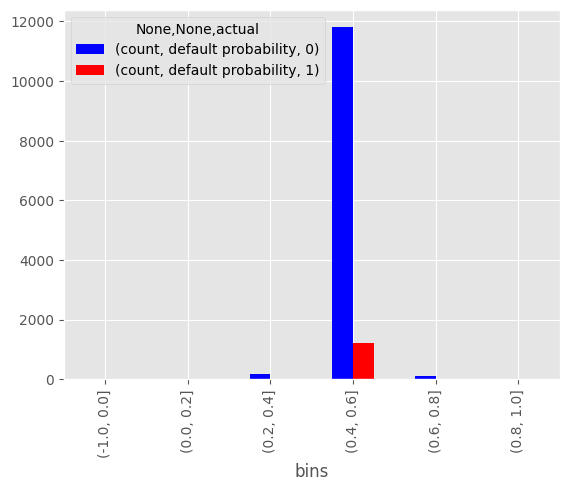

In [ ]:
pd.pivot_table(lr_prob, index='bins', columns =['actual'], aggfunc=['count']).plot(kind='bar', color=['blue', 'red'])

## Tuning XGBoost

In [ ]:
import xgboost as xgb

XGB_params  = {
        'final_estimator__n_estimators': [100, 200, 500],
        'final_estimator__learning_rate': [0.01, 0.1, 0.3],
        'final_estimator__max_depth': [3, 6, 10],
    }
#Random Search
random_XGB = RandomizedSearchCV(estimator=XGBClassifier(), scoring='f1', param_distributions=XGB_params, cv = 3, n_jobs=-1)

start_time = time.time()
random_xgb_result = random_XGB.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_xgb_result.best_score_, random_xgb_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

In [ ]:
optimal_xgbc = XGBClassifier(n_estimators= 500, max_depth= 6, learning_rate= 0.3)

optimal_xgbc.fit(X_train[top38], y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
optimal_xgb = {'opt_xgb': XGBClassifier(n_estimators= 500, max_depth= 6, learning_rate= 0.3)}

In [ ]:
# print(xgb.feature_importances_)

xgb_feature_imp = pd.Series(optimal_xgbc.feature_importances_,index=X_train.columns).sort_values(ascending=False)

xgb_feature_imp

Delinquency - two years           0.039662
Public Record                     0.035983
Inquires - six months             0.033573
Sub Grade_F1                      0.026708
Sub Grade_C1                      0.025821
                                    ...   
Grade_A                           0.006686
Sub Grade_G4                      0.006571
Verification Status_Verified      0.000000
Term_5 years                      0.000000
Collection 12 months Medical_1    0.000000
Length: 76, dtype: float32

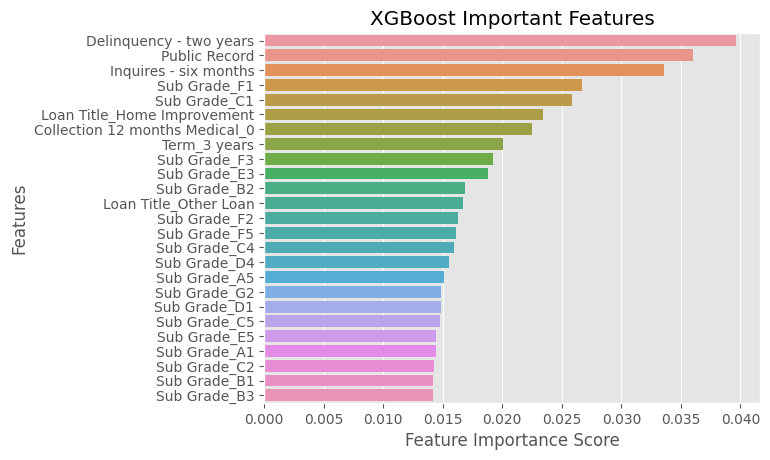

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
# Creating a bar plot
sns.barplot(x=xgb_feature_imp[:25], y=xgb_feature_imp.index[:25])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("XGBoost Important Features")
#plt.legend(iris.feature_names)
plt.show()

In [ ]:
#Testing the result of the suggested optimal hyper parameters

opt_xgb_scores = pd.DataFrame(model_eval(X_train, y_train, optimal_xgb, metrics = "f1"))

xgb_bivar_df = pd.DataFrame(get_bivar(opt_xgb_scores))

training XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) ...


  0%|          | 0/1 [00:07<?, ?it/s]


KeyboardInterrupt: ignored

In [ ]:
opt_xgb_scores, xgb_bivar_df

### XGB Test Results

In [ ]:
xgb_y_pred = optimal_xgbc.predict(X_test)

xgb_report = classification_report(y_test, xgb_y_pred)

print(xgb_report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     12063
           1       0.08      0.01      0.02      1231

    accuracy                           0.90     13294
   macro avg       0.49      0.50      0.48     13294
weighted avg       0.83      0.90      0.86     13294



# Binned XGB Probabilities

In [ ]:
xgb_y_prob = optimal_xgbc.predict_proba(X_test[top38])

In [ ]:
xgb_prob = pd.DataFrame(xgb_y_prob[:, 1], columns=['default probability'])

xgb_prob

,default probability
0,0.237053
1,0.017156
2,0.120927
3,0.270628
4,0.045484
...,...
13289,0.057965
13290,0.032809
13291,0.063938
13292,0.099558


In [ ]:
xgb_actual = y_test.reset_index()

xgb_actual

,index,Loan Status
0,61227,0
1,37522,0
2,52029,0
3,41552,0
4,11990,0
...,...,...
13289,61382,0
13290,38243,0
13291,7643,1
13292,43220,0


In [ ]:
xgb_prob['actual'] = xgb_actual['Loan Status']

xgb_prob['actual']

0        0
1        0
2        0
3        0
4        0
        ..
13289    0
13290    0
13291    1
13292    0
13293    0
Name: actual, Length: 13294, dtype: int64

In [ ]:
xgb_prob['bins']= pd.cut(xgb_prob['default probability'], [-1., 0., .2, .4, .6, .8, 1.])

In [ ]:
pd.pivot_table(xgb_prob, index='bins', columns =['actual'], aggfunc=['count'])

count      
            default probability      
actual                        0     1
bins                                 
(-1.0, 0.0]                   0     0
(0.0, 0.2]                10627  1071
(0.2, 0.4]                 1082   119
(0.4, 0.6]                  287    33
(0.6, 0.8]                   58     7
(0.8, 1.0]                    9     1

<Axes: xlabel='bins'>

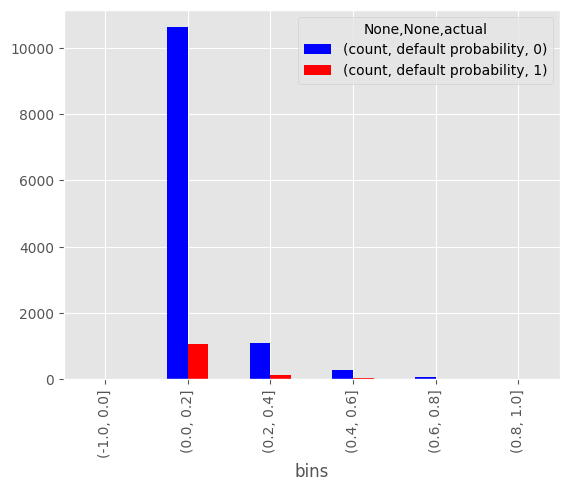

In [ ]:
pd.pivot_table(xgb_prob, index='bins', columns =['actual'], aggfunc=['count']).plot(kind='bar', color=['blue', 'red'])

## Random Forest

### Grid Search

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create the Random Forest classifier
# rf = RandomForestClassifier()

# # Perform GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

### Random Search

In [ ]:

#random forest parameters
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]


rf_random_grid = {'n_estimators': n_estimators,


'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

#Random search
random_rf = RandomizedSearchCV(estimator=RandomForestClassifier(max_depth=10), scoring='f1', param_distributions=rf_random_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_rf_result = random_rf.fit(X_train,y_train)
# Summarize results
print("Best: %f using %s" % (random_rf_result.best_score_, random_rf_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

In [ ]:
# fitting optimal hyperparameters into a RF model

optimal_rf = {'opt_rf' : RandomForestClassifier(n_estimators = 20, min_samples_split = 10, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 40, bootstrap = False)
}

In [ ]:
#Create a Gaussian Classifier
rs_opt_rf = RandomForestClassifier(n_estimators = 20, min_samples_split = 10, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 40, bootstrap = False)

#Train the model using the training sets y_pred=clf.predict(X_test)
rs_opt_rf.fit(X_train[top38], y_train)

RandomForestClassifier(bootstrap=False, max_depth=40, min_samples_split=10,
                       n_estimators=20)

In [ ]:
rf_feature_imp = pd.Series(rs_opt_rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
rf_feature_imp

Delinquency - two years    0.086547
Inquires - six months      0.057716
Total Current Balance      0.054375
Public Record              0.046551
Total Collection Amount    0.042176
                             ...   
Grade_G                    0.000872
Sub Grade_G1               0.000761
Sub Grade_G3               0.000628
Sub Grade_G5               0.000503
Sub Grade_G4               0.000347
Length: 76, dtype: float64

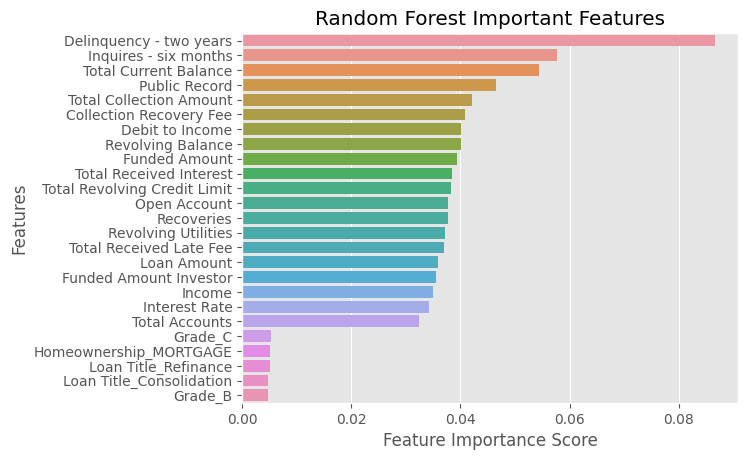

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
# Creating a bar plot
sns.barplot(x=rf_feature_imp[:25], y=rf_feature_imp.index[:25])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Random Forest Important Features")
#plt.legend(iris.feature_names)
plt.show()

In [ ]:
#Testing the result of the suggested optimal hyper parameters

opt_rf_scores = pd.DataFrame(model_eval(X_train,y_train, optimal_rf, metrics = "f1"))

rf_bivar_df = pd.DataFrame(get_bivar(opt_rf_scores))

training RandomForestClassifier(bootstrap=False, max_depth=40, min_samples_split=10,
                       n_estimators=20) ...


  0%|          | 0/1 [00:42<?, ?it/s]


KeyboardInterrupt: ignored

In [ ]:
# Bias and variance of the optimal RF model

opt_rf_scores, rf_bivar_df

(     opt_rf
 0  0.950847
 1  0.955947
 2  0.953520
 3  0.951840
 4  0.951122
 5  0.954399
 6  0.953311
 7  0.957438
 8  0.953026
 9  0.947990,
     model    bias     var
 0  opt_rf  0.0471  0.0026)

## RF Test Results

In [ ]:
rf_y_pred = rs_opt_rf.predict(X_test)

rf_report = classification_report(y_test, rf_y_pred)

print(rf_report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12063
           1       0.10      0.03      0.04      1231

    accuracy                           0.89     13294
   macro avg       0.50      0.50      0.49     13294
weighted avg       0.83      0.89      0.86     13294



In [ ]:
#Create a Gaussian Classifier
base_rf = RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
base_rf.fit(X_train[rf_feature_imp.index[:5]], y_train)

base_rf_y_pred = base_rf.predict(X_test[rf_feature_imp.index[:5]])

base_rf_report = classification_report(y_test, base_rf_y_pred)

print(base_rf_report)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85     12063
           1       0.08      0.18      0.12      1231

    accuracy                           0.74     13294
   macro avg       0.49      0.49      0.48     13294
weighted avg       0.83      0.74      0.78     13294



In [ ]:
X_test.shape

(13294, 76)

# Binned RF probabilities

In [ ]:
rf_y_prob = rs_opt_rf.predict_proba(X_test[top38])

In [ ]:
rf_y_prob

array([[0.78333333, 0.21666667],
       [0.83206349, 0.16793651],
       [0.77267157, 0.22732843],
       ...,
       [0.95      , 0.05      ],
       [0.75863095, 0.24136905],
       [0.9375    , 0.0625    ]])

In [ ]:
rf_prob = pd.DataFrame(rf_y_prob[:, 1], columns=['default probability'])

rf_prob

,default probability
0,0.216667
1,0.167937
2,0.227328
3,0.157738
4,0.101587
...,...
13289,0.217321
13290,0.420000
13291,0.050000
13292,0.241369


In [ ]:
rf_actual = y_test.reset_index()

rf_actual

,index,Loan Status
0,61227,0
1,37522,0
2,52029,0
3,41552,0
4,11990,0
...,...,...
13289,61382,0
13290,38243,0
13291,7643,1
13292,43220,0


In [ ]:
rf_prob['actual'] = rf_actual['Loan Status']

rf_prob['actual']

0        0
1        0
2        0
3        0
4        0
        ..
13289    0
13290    0
13291    1
13292    0
13293    0
Name: actual, Length: 13294, dtype: int64

In [ ]:
rf_prob['bins']= pd.cut(rf_prob['default probability'], [-1., 0., .2, .4, .6, .8, 1.])

In [ ]:
rf_prob


,default probability,actual,bins
0,0.216667,0,"(0.2, 0.4]"
1,0.167937,0,"(0.0, 0.2]"
2,0.227328,0,"(0.2, 0.4]"
3,0.157738,0,"(0.0, 0.2]"
4,0.101587,0,"(0.0, 0.2]"
...,...,...,...
13289,0.217321,0,"(0.2, 0.4]"
13290,0.420000,0,"(0.4, 0.6]"
13291,0.050000,1,"(0.0, 0.2]"
13292,0.241369,0,"(0.2, 0.4]"


In [ ]:
rf_prob.isna().sum()

default probability    0
actual                 0
bins                   0
dtype: int64

In [ ]:
pd.pivot_table(rf_prob, index='bins', columns =['actual'], aggfunc=['count'])

count     
            default probability     
actual                        0    1
bins                                
(-1.0, 0.0]                   9    1
(0.0, 0.2]                 4892  485
(0.2, 0.4]                 6183  638
(0.4, 0.6]                  926  101
(0.6, 0.8]                   51    6
(0.8, 1.0]                    2    0

<Axes: xlabel='bins'>

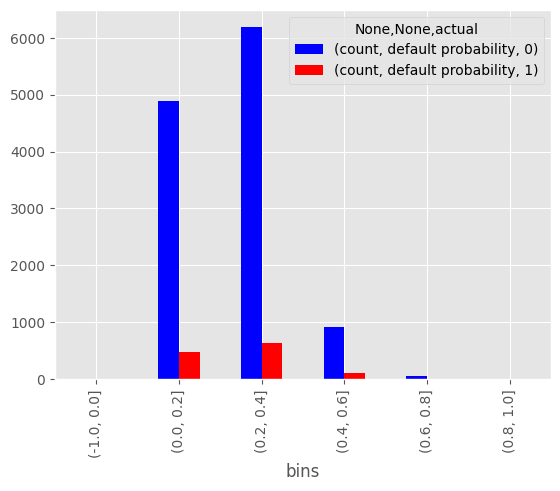

In [ ]:
pd.pivot_table(rf_prob, index='bins', columns =['actual'], aggfunc=['count']).plot(kind='bar', color=['blue', 'red'])